# The Laplace Transform

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Definition

The [Laplace transform](https://en.wikipedia.org/wiki/Laplace_transform) constitutes an integral transform with the complex exponential function $e^{s t}$ as kernel. It maps a complex-valued signal $x(t) \in \mathbb{C}$ with real-valued independent variable $t \in \mathbb{R}$ into its complex-valued Laplace transform $X(s) \in \mathbb{C}$ with complex-valued independent variable $s \in \mathbb{C}$. The Laplace transform is named after its discoverer [Pierre-Simon Laplace](https://en.wikipedia.org/wiki/Pierre-Simon_Laplace).

Complex exponential functions constitute eigenfunctions of linear time-invariant (LTI) systems. The Laplace transform is therefore of special use in the context of signals and LTI systems. It is introduced in the following.

### Two-Sided Laplace Transform

The two-sided (or bilateral) Laplace transform is defined as

\begin{equation}
X(s) = \int_{-\infty}^{\infty} x(t) \, e^{- s t} \; dt
\end{equation}

where $X(s) = \mathcal{L} \{ x(t) \}$ denotes the Laplace transform of $x(t)$. A complex signal $x(t) \in \mathbb{C}$ with real-valued independent variable $t \in \mathbb{R}$ is represented by its complex valued Laplace transform $X(s) \in \mathbb{C}$ with complex independent variable $s \in \mathbb{C}$. The variable $s$ can be interpreted as [complex frequency](../continuous_signals/standard_signals.ipynb#Complex-Exponential-Signal) $s = \sigma + j \omega$ with $\sigma, \omega \in \mathbb{R}$.

Whether a Laplace transform $X(s) = \mathcal{L} \{ x(t) \}$ exists depends on the complex frequency $s$ and the signal $x(t)$ itself. All values $s$ for which the Laplace transform converges form a [*region of convergence*](https://en.wikipedia.org/wiki/Radius_of_convergence) (ROC). The Laplace transforms of two different signals may differ only with respect to their ROCs. Consequently, the ROC needs to be explicitly given for an unique inversion of the Laplace transform.

### One-Sided Laplace Transform

Causal signals play an important role in the theory of signals and system. For a causal signal $x(t) = 0$ for $t <0$, the relation $x(t) = x(t) \cdot \epsilon(t)$ holds. Introducing this into the definition of the two-sided Laplace transformation yields

\begin{equation}
X(s) = \int_{-\infty}^{\infty} x(t) \cdot \epsilon(t) \, e^{- s t} \; dt = \int_{0}^{\infty} x(t) \, e^{- s t} \; dt
\end{equation}

This motivates the definition of a one-sided Laplace transform

\begin{equation}
X(s) = \int_{0}^{\infty} x(t) \, e^{- s t} \; dt
\end{equation}

In the literature both the one- and two-sided Laplace transform are termed as Laplace transform. Both give the same result for causal signals.

### Transformation of the Dirac Impulse

The transform $\mathcal{L} \{ \delta(t) \}$ of the [Dirac impulse](../continuous_signals/standard_signals.ipynb#Dirac-Impulse) is derived by introducing $\delta(t)$ into the definition of the two-sided Laplace transform and exploiting the sifting property of the Dirac delta function

\begin{equation}
\mathcal{L} \{ \delta(t) \} = \int_{-\infty}^{\infty} \delta(t) \, e^{- s t} dt = e^{- s t} \Big\vert_{t=0}  =  1
\end{equation}
for $s \in \mathbb{C}$. The ROC covers the entire complex plane.

The transform of the Dirac impulse is equal to one. Hence, all complex frequencies $s$ are present with equal weight. This is an important property in the theory of signals and systems, since the Dirac impulse is used to characterize linear time-invariant (LTI) systems by their [impulse response](../systems_time_domain/impulse_response.ipynb) $h(t) = \mathcal{H} \{ \delta(t) \}$.

**Example - Transformation of the Dirac impulse**

The Laplace transform of the Dirac impulse can be derived in `SymPy` by direct evaluation of above integral

In [1]:
import sympy as sym
sym.init_printing()

t = sym.symbols('t', real=True)
s = sym.symbols('s', complex=True)

X = sym.integrate(sym.DiracDelta(t)*sym.exp(-s*t), (t, -sym.oo, sym.oo))
X

**Exercise**

* Derive the two-sided Laplace transform of a shifted Dirac impulse $\delta(t - \tau)$ either by manual evaluation of the integral or by modification of above example.

* Derive the one-sided Laplace transform of a shifted Dirac impulse $\delta(t - \tau)$. Hint: Differentiate between the cases $\tau < 0$ and $\tau > 0$.

### Transformation of the Causal Complex Exponential Signal

The transform $X(s) = \mathcal{L} \{ x(t) \}$ of the causal complex exponential signal

\begin{equation}
x(t) = \epsilon(t) \cdot e^{-s_0 t}
\end{equation}

with complex frequency $s_0 \in \mathbb{C}$ is derived by evaluation of the definition of the one-sided Laplace transform

\begin{equation}
\begin{split}
X(s) &= \int_{0}^{\infty} e^{-s_0 t} \cdot e^{-s t} \; dt = \frac{-e^{-(s+s_0)t}}{s+s_0} \, \bigg\vert_{0}^{\infty} = \frac{-1}{s+s_0} \left[ \lim_{t \to \infty} \left( e^{- (s+s_0) t} \right) -1 \right] \\
&= \frac{1}{s + s_0}
\end{split}
\end{equation}

As can be concluded from the limit case above, the Laplace transform converges only for $\Re \{ s + s_0 \} > 0$. Hence, the ROC is given as

\begin{equation}
\Re \{ s \} > \Re \{ - s_0 \} 
\end{equation}

Combining above findings, the transformation of the causal complex exponential signal reads

\begin{equation}
\mathcal{L} \{ \epsilon(t) \cdot e^{-s_0 t} \} = \frac{1}{s + s_0} \qquad \text{for } \Re \{ s \} > \Re \{ - s_0 \}
\end{equation}

**Example - Transformation of exponential signal**

In `SymPy` the [Laplace transform](http://docs.sympy.org/latest/modules/integrals/integrals.html?highlight=laplace#sympy.integrals.transforms.laplace_transform) is defined as one-sided transformation. The respective function of `SymPy` is utilized in the following to calculate the transform of the causal complex exponential signal.

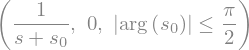

In [2]:
s0 = sym.symbols('s0', complex=True)

X, a, cond = sym.laplace_transform(sym.exp(-s0*t), t, s)
X, a, cond

The function returns three results. The first result is the Laplace transform $X(s)$, the second result $a$ is the half-plane of convergence with $\Re \{ s \} > a$ and the third result represents an auxiliary convergence condition.

### Transformation of the Heaviside Signal

The Laplace transform of the [Heaviside signal](../continuous_signals/standard_signals.ipynb#Heaviside-Signal) is derived from above transform of the causal complex exponential signal $\epsilon(t) \cdot e^{-s_0 t}$ by setting $s_0 = 0$

\begin{equation}
\mathcal{L} \{ \epsilon(t) \} = \frac{1}{s} \qquad \text{for } \Re \{ s \} > 0
\end{equation}

## Convergence

A sufficient but not necessary condition for the existence of the Laplace transform $X(s) = \mathcal{L} \{ x(t) \}$ of a given signal $x(t)$ is

\begin{equation}
\int_{-\infty}^{\infty} | x(t) \cdot e^{- \sigma t} | \; dt < \infty
\end{equation}

where $\sigma = \Re\{ s \}$ denotes the real part of the complex frequency $s = \sigma + j \omega$ of the Laplace transform. Formally the signal $x(t)$ has to be a [locally integrable function](https://en.wikipedia.org/wiki/Locally_integrable_function).

The imaginary part $\omega = \Im \{ s \}$ of the complex frequency $s$ has no effect in terms of convergence. Consequently, the ROC is determined solely by its real part $\sigma = \Re\{ s \}$. For a right-sided signal with $x(t) = 0$ for $t < T_0$, the ROC is given in the form of $\Re \{ s \} > a$ with $a \in \mathbb{R}$. This can be concluded from the decay of the exponential term $e^{- \sigma t}$ for $t \to \infty$, which ensures convergence for a given $a$. However this reasoning holds only for signals with [exponential growth](https://en.wikipedia.org/wiki/Exponential_growth). Please refer to the [Laplace transform of the causal exponential signal](#Transformation-of-the-Causal-Complex-Exponential-Signal) for an example. 

The same reasoning leads to the ROCs for a left-sided and two-sided signal. The resulting ROCs are shown in the following illustration

![Region of convergence for left-/two-/right-sided signal](ROC.png)

The gray areas denote the values $s$ for which the Laplace transformation converges. The borders $a$ of these areas (dashed lines) depend on the signal $x(t)$. A more detailed discussion of the ROCs for the Laplace transform can be found in the literature, e.g. [[Girod et al.](index.ipynb#Literature)]

## Representation

The Laplace transform $X(s) = \mathcal{L} \{ x(t) \}$ depends on the complex frequency $s \in \mathbb{C}$ and is in general complex valued $X(s) \in \mathbb{C}$. It can be illustrated by plotting its magnitude $|X(s)|$ and phase $\varphi (s)$ or real $\Re \{ X(s) \}$ and imaginary $\Im \{ X(s) \}$ part in the complex $s$-plane. The resulting three-dimensional plots are often not very illustrative. 

However, many Laplace transforms of interest in the theory of signals and systems are [rational functions](https://en.wikipedia.org/wiki/Rational_function) in $s$. The polynomials of the numerator and denominator can be represented by their complex [roots](https://en.wikipedia.org/wiki/Zero_of_a_function#Polynomial_roots) and a constant factor. The roots of the numerator are termed as *zeros* while the roots of the denominator are termed as *poles* of $X(s)$. The polynomial and the zero/pole representation of a rational Laplace transform are equivalent

\begin{equation}
X(s) = \frac{\sum_{m=0}^{M} \beta_m s^m}{\sum_{n=0}^{N} \alpha_n s^n} = K \cdot \frac{\prod_{\mu=0}^{Q} (s - s_{0 \mu})}{\prod_{\nu=0}^{P} (s - s_{\infty \nu})}
\end{equation}

where $M$ and $N$ denote the order of the numerator/denominator polynomial, $s_{0 \mu}$ and $s_{\infty \nu}$ the $\mu$-th zero/$\nu$-th pole of $X(s)$, and $Q = M-1$ and $P = N-1$ the total number of zeros and poles, respectively. For $M=N$ the factor $K = \frac{\beta_M}{\alpha_N}$. If $M > N$ at least one pole is located at $|s| = \infty$.

It is common to illustrate the poles and zeros in a [pole-zero plot](https://en.wikipedia.org/wiki/Pole%E2%80%93zero_plot). Here the locations of the complex poles and zeros, their degrees and the factor $K$ are plotted in the $s$-plane

![Illustration of the pole and zero locations in a pole-zero plot](pz_plot.png)

The locations of the poles and zeros provide insights into the composition of a signal. For instance, the Laplace transform of the [complex exponential signal](#Transformation-of-the-Causal-Complex-Exponential-Signal) has a pole at $s = - s_0$. A signal which is composed from a superposition of complex exponential signals will have multiple poles whose positions are related to the complex frequencies it is composed of.

**Exercise**

* Derive $X(s)$ together with its ROC from above pole-zero plot.

**Example - Illustration of Laplace transform of the exponential signal**

The Laplace transform of the causal complex exponential function

\begin{equation}
X(s) = \frac{1}{s + s_0} \qquad \text{for } \Re \{ s \} > \Re \{ - s_0 \}
\end{equation}

is illustrated by plotting its magnitude $|X(s)|$ in the $s$-plane $s = \sigma + j \omega$ for $s_0 = 1 + j$

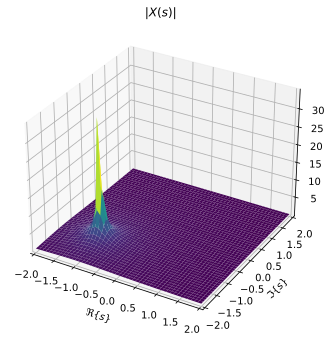

In [3]:
sigma, omega = sym.symbols('sigma omega')

X = 1/(s + s0)
X1 = X.subs({s: sigma+sym.I*omega, s0: 1+sym.I})

sym.plotting.plot3d(abs(X1), (sigma, -2, 2), (omega, -2, 2),
                    xlabel=r'$\Re\{s\}$', ylabel=r'$\Im\{s\}$', title=r'$|X(s)|$');

Alternatively, the Laplace transform is illustrated by its pole-zero plot. First the poles

In [4]:
poles = sym.roots(sym.denom(X), s)
poles

and zeros are computed

In [5]:
zeros = sym.roots(sym.numer(X), s)
zeros

Above dictionaries are composed of the poles and zeros, and their degrees. 

In order to illustrate the location of poles and zeros in the $s$-plane, a function is defined for a pole-zero plot using the Python library [`matplotlib`](http://matplotlib.org/)

In [6]:
import matplotlib.pyplot as plt


def pole_zero_plot(poles, zeros, ax=None):

    for pole in poles:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
    for zero in zeros:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10)

    if ax is None:
        ax = plt.gca()
    ax.set_aspect(1)

    plt.axis([-2, 2, -2, 2])
    plt.xlabel(r'$\Re \{ s \}$')
    plt.ylabel(r'$\Im \{ s \}$')
    plt.grid()

The pole-zero plot is shown for $s_0 = 1 + j$

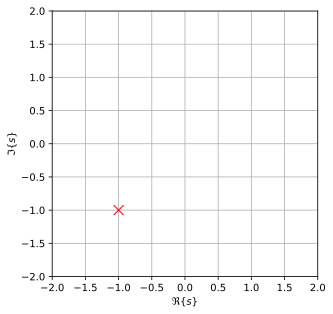

In [7]:
X2 = X.subs(s0, 1+sym.I)
pole_zero_plot(sym.roots(sym.denom(X2), s), sym.roots(sym.numer(X2), s))

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Continuous- and Discrete-Time Signals and Systems - Theory and Computational Examples*.